<a href="https://colab.research.google.com/github/sikunaniket1234/studentplacementprediction/blob/main/Student_Placement_Prediction_Using_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [67]:
import numpy as np
import pandas as pd

# data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# machine learning
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn import preprocessing

In [68]:
data = pd.read_csv("/content/drive/MyDrive/Placement_Data_Full_Class.csv")

In [69]:
data.head()


,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [70]:
print('='*50)
print("Columns in data")
print('='*50)
print(data.columns.values)

Columns in data
['sl_no' 'gender' 'ssc_p' 'ssc_b' 'hsc_p' 'hsc_b' 'hsc_s' 'degree_p'
 'degree_t' 'workex' 'etest_p' 'specialisation' 'mba_p' 'status' 'salary']


Let's have look at each column information.
- sl_no : Serial Number

- gender : Candidate gender --> Male='M',Female='F'

- ssc_p : SSC (10th) Percentage

- ssc_b : SSC Board of Education --> Central (or) Others

- hsc_p : HSC (12th) percentage

- hsc_b : HSC Board of Education --> Central/ Others

- hsc_s : Specialization in HSC

- degree_p : Degree Percentage

- degree_t : Under Graduation (Degree type)- Field of degree education

- workex : Work Experience

- etest_p : Employability test percentage ( conducted by college)

- specialisation : Post Graduation(MBA)- Specialization

- mba_p : MBA percentage

- status : Status of placement- Placed/Not placed

- salary : Salary offered by corporate to candidates

In [71]:
print('='*50)
print("\nDescribe data\n")
print('='*50) 
print(data.describe())


Describe data

            sl_no       ssc_p       hsc_p    degree_p     etest_p       mba_p  \
count  215.000000  215.000000  215.000000  215.000000  215.000000  215.000000   
mean   108.000000   67.303395   66.333163   66.370186   72.100558   62.278186   
std     62.209324   10.827205   10.897509    7.358743   13.275956    5.833385   
min      1.000000   40.890000   37.000000   50.000000   50.000000   51.210000   
25%     54.500000   60.600000   60.900000   61.000000   60.000000   57.945000   
50%    108.000000   67.000000   65.000000   66.000000   71.000000   62.000000   
75%    161.500000   75.700000   73.000000   72.000000   83.500000   66.255000   
max    215.000000   89.400000   97.700000   91.000000   98.000000   77.890000   

              salary  
count     148.000000  
mean   288655.405405  
std     93457.452420  
min    200000.000000  
25%    240000.000000  
50%    265000.000000  
75%    300000.000000  
max    940000.000000  


In [72]:
print('='*50)
print("\nData Information\n")
print('='*50) 
print(data.info())


Data Information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl_no           215 non-null    int64  
 1   gender          215 non-null    object 
 2   ssc_p           215 non-null    float64
 3   ssc_b           215 non-null    object 
 4   hsc_p           215 non-null    float64
 5   hsc_b           215 non-null    object 
 6   hsc_s           215 non-null    object 
 7   degree_p        215 non-null    float64
 8   degree_t        215 non-null    object 
 9   workex          215 non-null    object 
 10  etest_p         215 non-null    float64
 11  specialisation  215 non-null    object 
 12  mba_p           215 non-null    float64
 13  status          215 non-null    object 
 14  salary          148 non-null    float64
dtypes: float64(6), int64(1), object(8)
memory usage: 25.3+ KB
None


<Axes: >

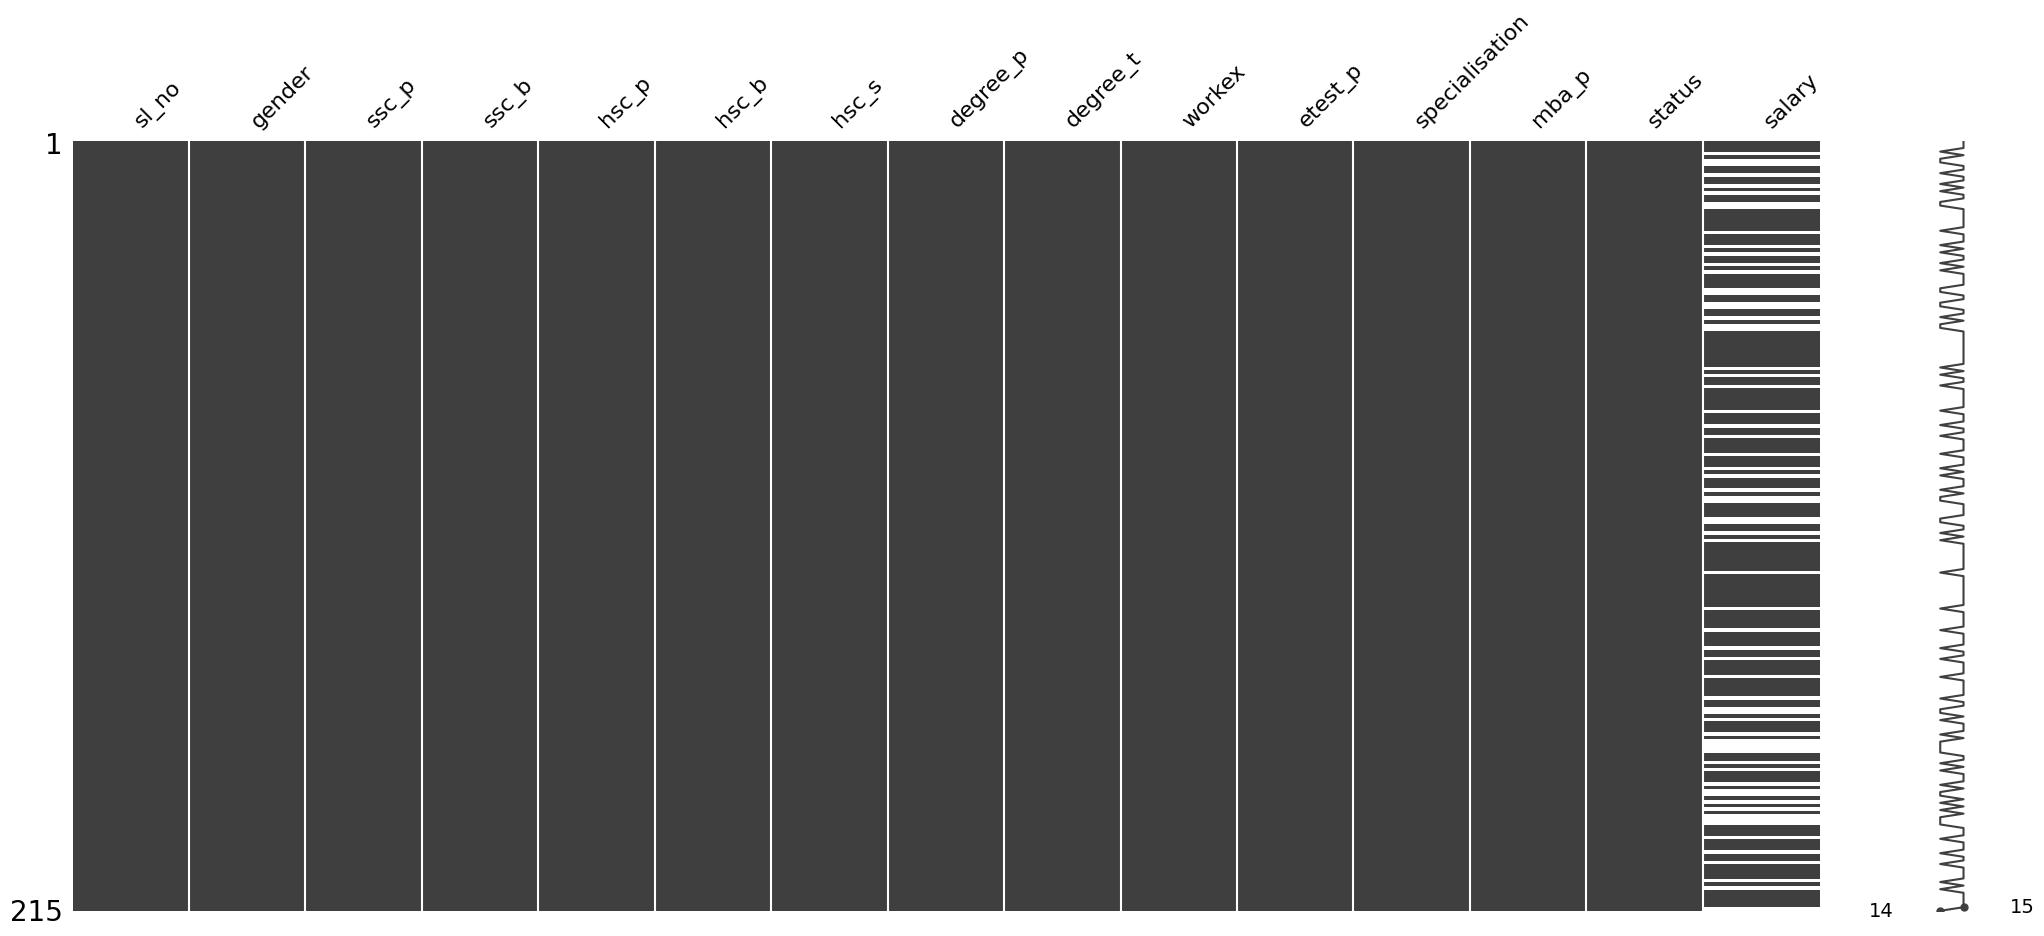

In [73]:
import missingno as msno 
msno.matrix(data)

In [74]:
data = data.drop(['sl_no'], axis=1)

#**EXPLORATORY DATA ANALYSIS**

**The Class Variable; Status**

<Axes: xlabel='status', ylabel='count'>

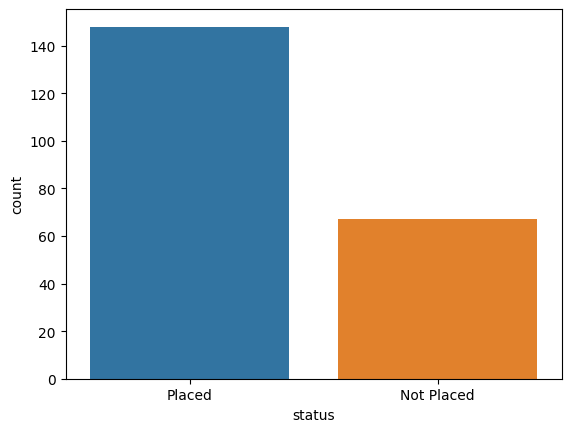

In [75]:
sns.countplot(x='status', data=data)

**Gender**

Let's check whethere gender affect on placement.

- Out of 215 candidates, 139 are male and 76 are female.

In [76]:
data['gender'].value_counts()

M    139
F     76
Name: gender, dtype: int64

In [77]:
df = pd.DataFrame(data.groupby(['gender','status'])['status'].count())
df

status
gender status            
F      Not Placed      28
       Placed          48
M      Not Placed      39
       Placed         100

<Axes: xlabel='gender', ylabel='count'>

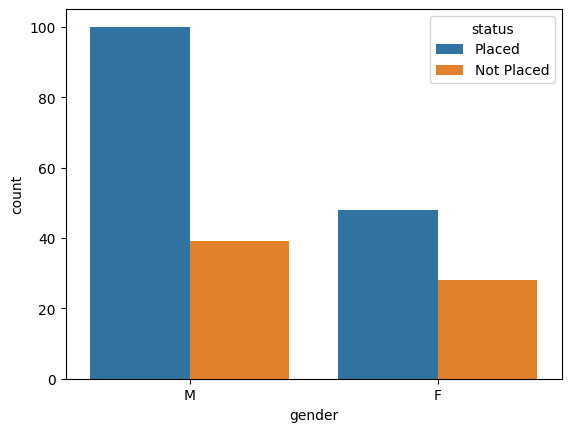

In [78]:
sns.countplot(x='gender', hue='status', data=data)

Male have high chances of getting placed compared to females.

**SSC Percentage**

Text(0.5, 0, 'SSC %')

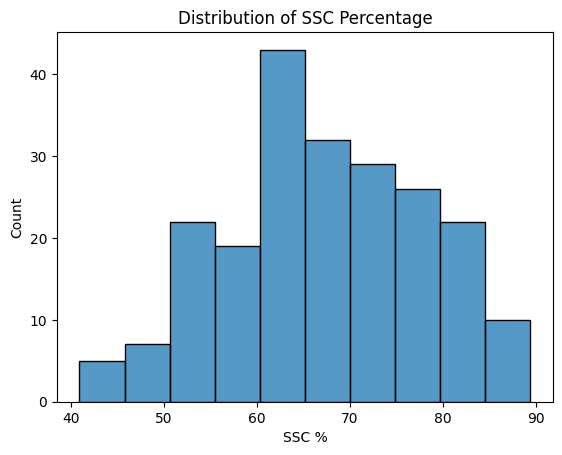

In [79]:
sns.histplot(data['ssc_p'], kde=False)
plt.title('Distribution of SSC Percentage')
plt.xlabel('SSC %')

Text(13.819444444444445, 0.5, 'SSC %')

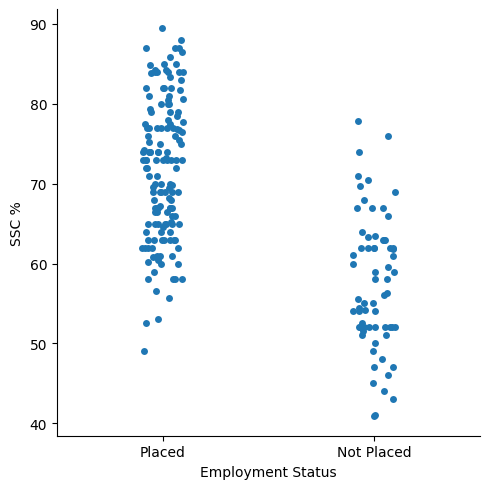

In [80]:
sns.catplot(y='ssc_p', x='status', data=data)
plt.xlabel('Employment Status')
plt.ylabel('SSC %')

In [81]:
data['ssc_b'].value_counts()

Central    116
Others      99
Name: ssc_b, dtype: int64

In [82]:
df = pd.DataFrame(data.groupby(['ssc_b','status'])['status'].count())
df

status
ssc_b   status            
Central Not Placed      38
        Placed          78
Others  Not Placed      29
        Placed          70

Students who are place have higer percentage in SSC.

**SSC Board**

<Axes: xlabel='ssc_b', ylabel='count'>

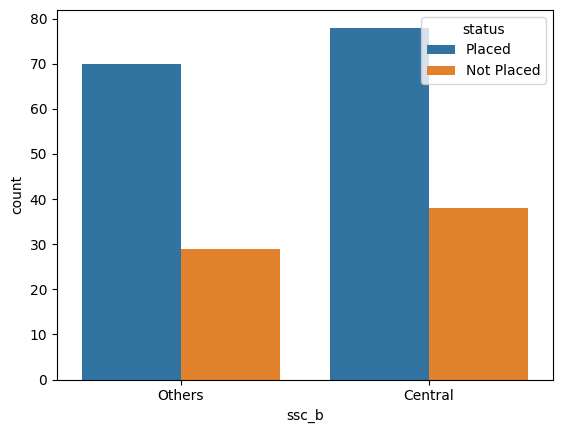

In [83]:
sns.countplot(x='ssc_b', hue='status', data=data)

From the above analysis we can say that, SSC board is not important to recruiters when it come to hiring candidates. So I am not going to use this feature while training model.

**HSC Percentage**

Text(0.5, 0, 'HSC %')

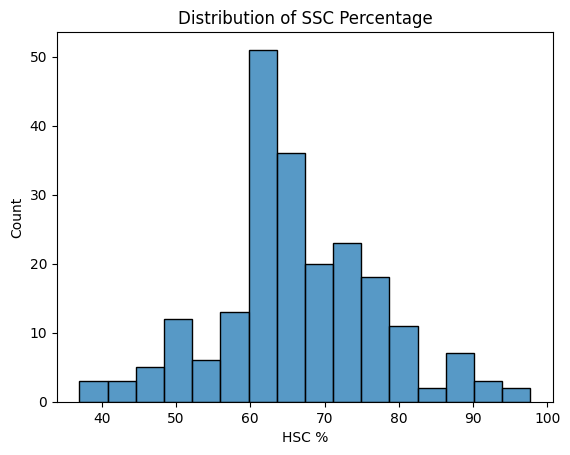

In [84]:
sns.histplot(data['hsc_p'], kde=False)
plt.title('Distribution of SSC Percentage')
plt.xlabel('HSC %')

Text(5.069444444444445, 0.5, 'HSC %')

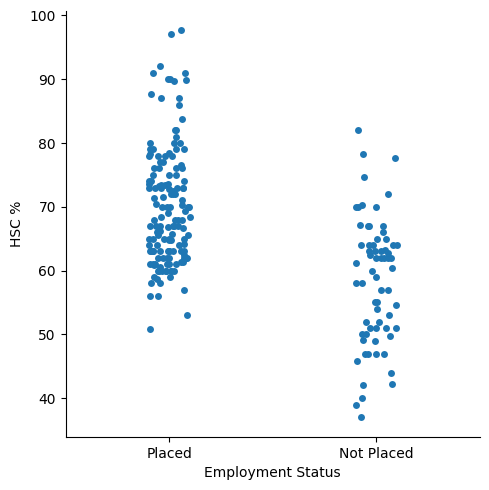

In [85]:
sns.catplot(y='hsc_p', x='status', data=data)
plt.xlabel('Employment Status')
plt.ylabel('HSC %')

HSC percentage are important features. As all placed students have higher percentages.

**HSC Board**

In [86]:
data['hsc_b'].value_counts()

Others     131
Central     84
Name: hsc_b, dtype: int64

In [87]:
df = pd.DataFrame(data.groupby(['hsc_b','status'])['status'].count())
df

status
hsc_b   status            
Central Not Placed      27
        Placed          57
Others  Not Placed      40
        Placed          91

<Axes: xlabel='hsc_b', ylabel='count'>

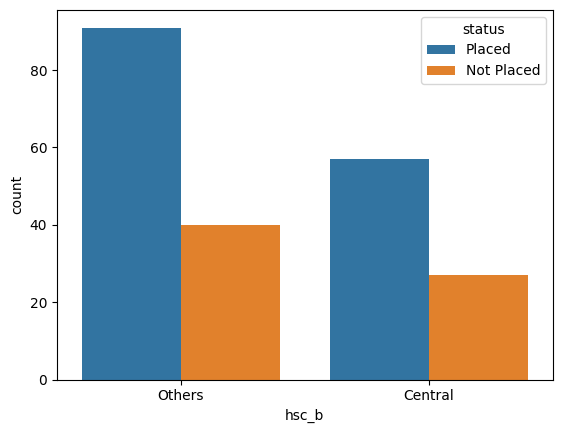

In [88]:
sns.countplot(x='hsc_b', hue='status', data=data)

From the above analysis we can say that, HSC board is not important to recruiters when it come to hiring candidates. So I am not going to use this feature while training model.

**HSC Specialisation**

In [89]:
data['hsc_s'].value_counts()

Commerce    113
Science      91
Arts         11
Name: hsc_s, dtype: int64

In [90]:
df = pd.DataFrame(data.groupby(['hsc_s','status'])['status'].count())
df

status
hsc_s    status            
Arts     Not Placed       5
         Placed           6
Commerce Not Placed      34
         Placed          79
Science  Not Placed      28
         Placed          63

<Axes: xlabel='hsc_s', ylabel='count'>

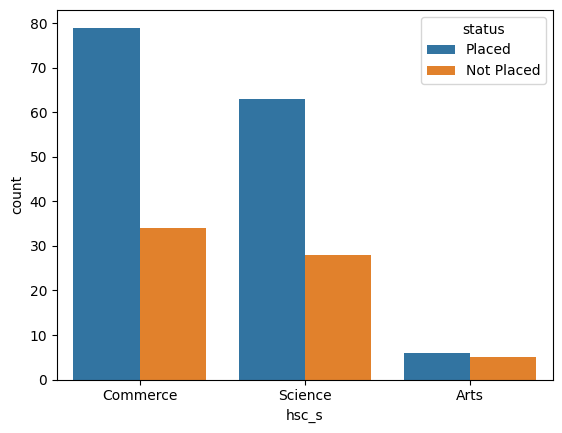

In [91]:
sns.countplot(x='hsc_s', hue='status', data=data)

**Degree Percentage**

Text(0.5, 0, 'Degree %')

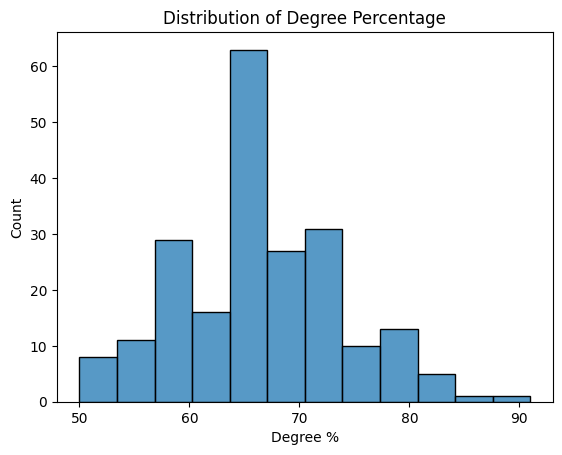

In [92]:
sns.histplot(data['degree_p'], kde=False)
plt.title('Distribution of Degree Percentage')
plt.xlabel('Degree %')

Text(13.819444444444445, 0.5, 'Degree %')

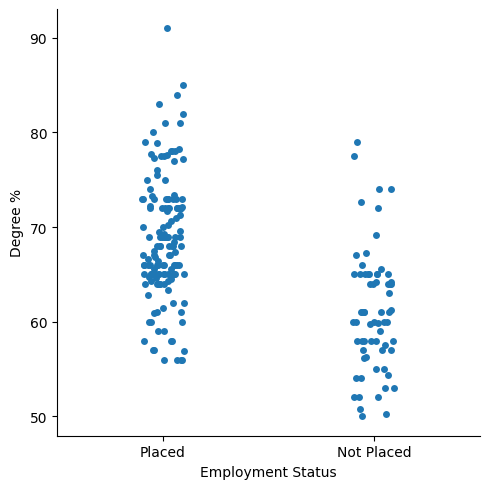

In [93]:
sns.catplot(y='degree_p', x='status', data=data)
plt.xlabel('Employment Status')
plt.ylabel('Degree %')

Like SSC and HSC percentages, Degree Percentages are also impotant factor to get placed.

**Degree Type**

In [94]:
data['degree_t'].value_counts()

Comm&Mgmt    145
Sci&Tech      59
Others        11
Name: degree_t, dtype: int64

In [95]:
df = pd.DataFrame(data.groupby(['degree_t','status'])['status'].count())
df

status
degree_t  status            
Comm&Mgmt Not Placed      43
          Placed         102
Others    Not Placed       6
          Placed           5
Sci&Tech  Not Placed      18
          Placed          41

<Axes: xlabel='degree_t', ylabel='count'>

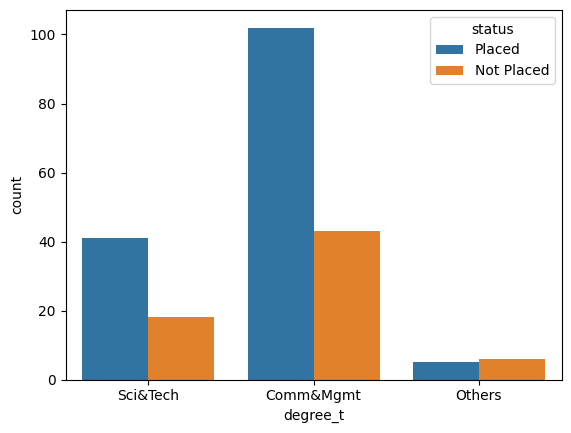

In [96]:
sns.countplot(x='degree_t', hue='status', data=data)

**Work Experience**

In [97]:
data['workex'].value_counts()

No     141
Yes     74
Name: workex, dtype: int64

In [98]:
df = pd.DataFrame(data.groupby(['workex','status'])['status'].count())
df

status
workex status            
No     Not Placed      57
       Placed          84
Yes    Not Placed      10
       Placed          64

<Axes: xlabel='workex', ylabel='count'>

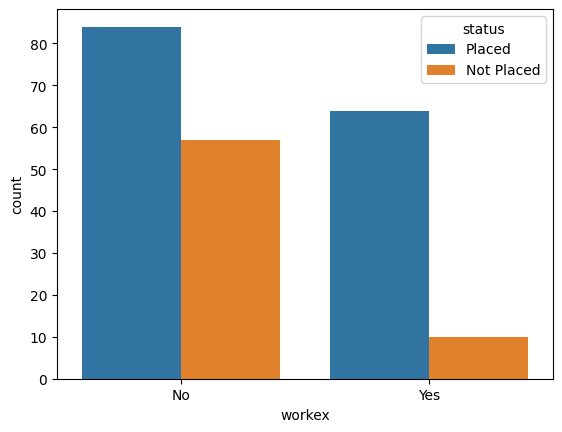

In [99]:
sns.countplot(x='workex', hue='status', data=data)

It is clear that candidate with work experience have higher chance of getting placed.

**Employment Test Percentage**

Text(0.5, 0, 'Employment Test %')

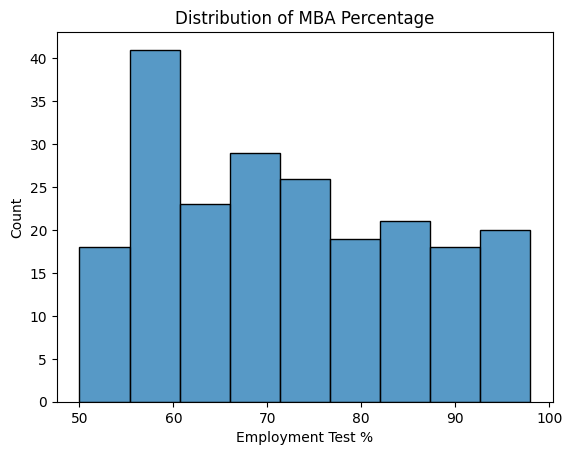

In [100]:
sns.histplot(data['etest_p'], kde=False)
plt.title('Distribution of MBA Percentage')
plt.xlabel('Employment Test %')

Text(5.069444444444445, 0.5, 'Employment Test %')

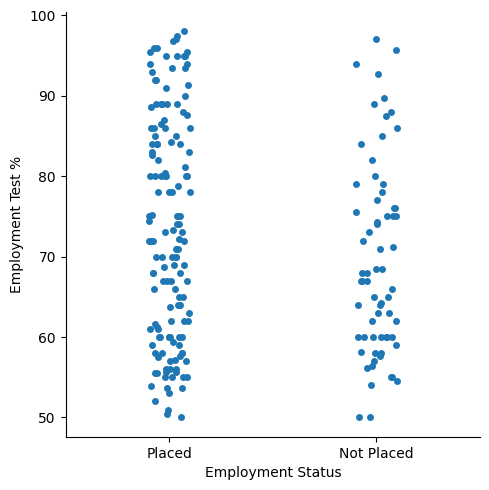

In [101]:
sns.catplot(y='etest_p', x='status', data=data)
plt.xlabel('Employment Status')
plt.ylabel('Employment Test %')

**MBA Specialization**

In [102]:
data['specialisation'].value_counts()

Mkt&Fin    120
Mkt&HR      95
Name: specialisation, dtype: int64

In [103]:
df = pd.DataFrame(data.groupby(['specialisation','status'])['status'].count())
df

status
specialisation status            
Mkt&Fin        Not Placed      25
               Placed          95
Mkt&HR         Not Placed      42
               Placed          53

Text(0.5, 0, 'MBA Specialization')

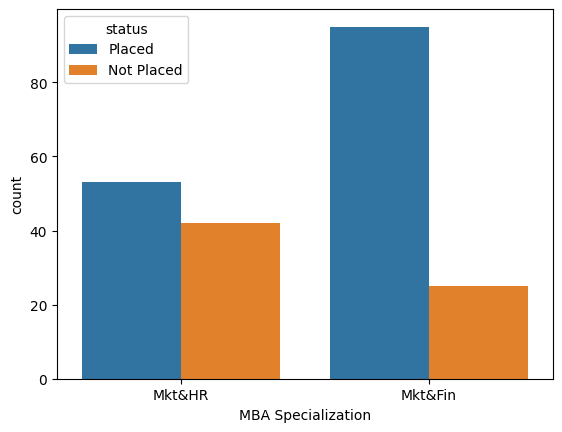

In [104]:
sns.countplot(x='specialisation', hue='status', data=data)
plt.xlabel('MBA Specialization')

**MBA Percentage**

Text(0.5, 0, 'MBA %')

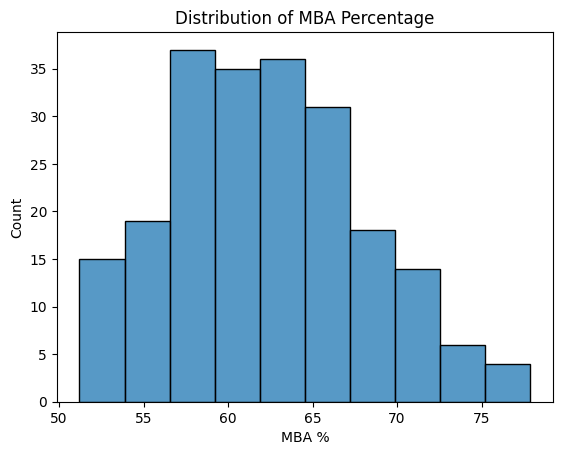

In [105]:
sns.histplot(data['mba_p'], kde=False)
plt.title('Distribution of MBA Percentage')
plt.xlabel('MBA %')

Text(13.819444444444445, 0.5, 'MBA %')

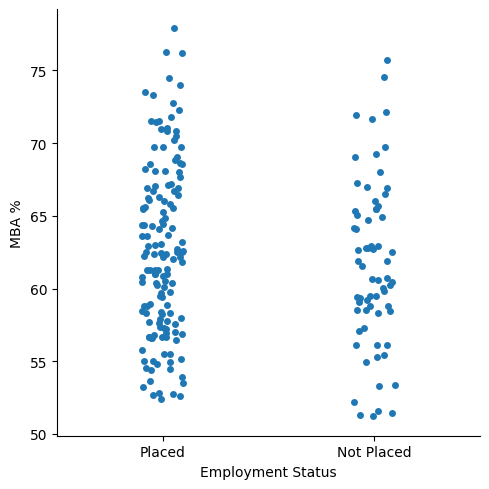

In [106]:
sns.catplot(y='mba_p', x='status', data=data)
plt.xlabel('Employment Status')
plt.ylabel('MBA %')

**Salary**

Text(0.5, 0, 'Salary')

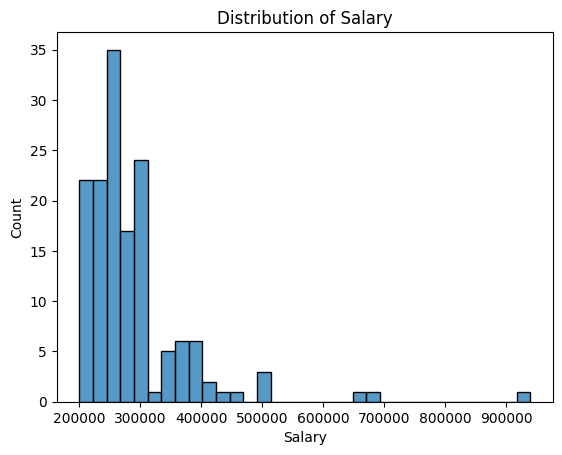

In [107]:
sns.histplot(data['salary'], kde=False)
plt.title('Distribution of Salary')
plt.xlabel('Salary')

Text(-21.180555555555557, 0.5, 'Salary')

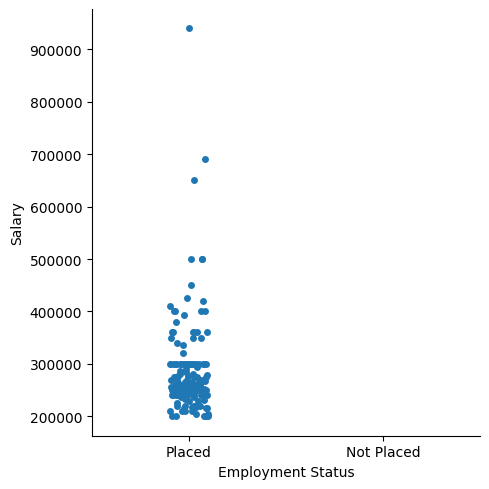

In [108]:
sns.catplot(y='salary', x='status', data=data)
plt.xlabel('Employment Status')
plt.ylabel('Salary')

It is obvious, we dont have salary details of Un-Placed candidate. Salary feature alone is enough to classify the placement status of candidate (if salary > 0 then placed else not placed). However, if we want to use only salary feature then we dont need machine learning for that, by looking only we can do that. So we are going to drop this column while performing classification model training.

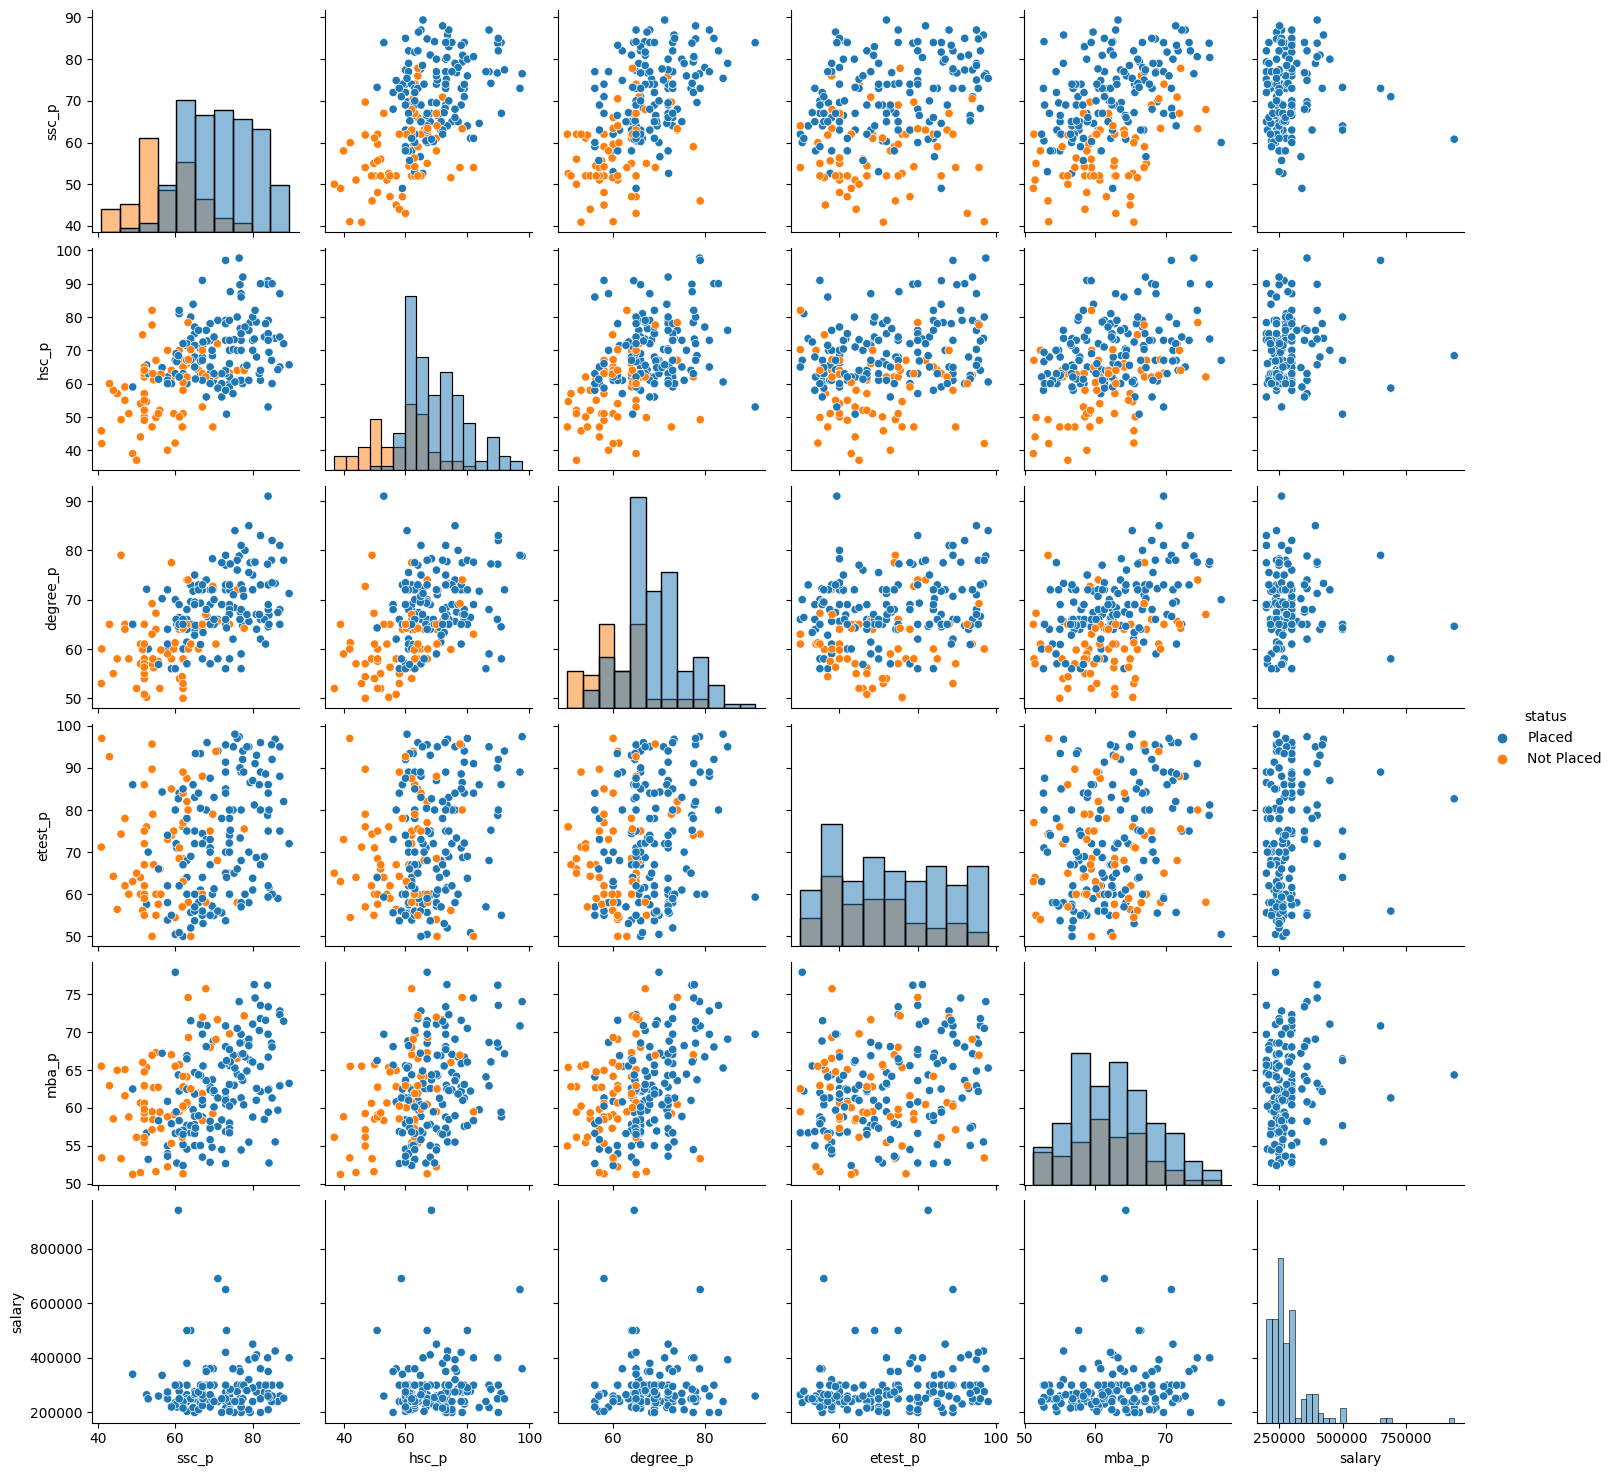

In [109]:
sns.pairplot(data=data[['ssc_p','hsc_p','degree_p', 'etest_p','mba_p','salary', 'status']], hue="status", diag_kind='hist')

#**FEATURE MAPPING AND GENERATION**

Let's drop all unwanted columns as menstioned in above section.

- SSC Board
- HSC Board
- HSC Specialisation
- Degree Type
- Salary




In [110]:
data.drop(['ssc_b','hsc_b', 'hsc_s', 'degree_t', 'salary'], axis=1, inplace=True)

Let's map categorical feature to numeric one. Categorical features:

- Gender : Gender feature have male and female values. I am going to map 0 for male and 1 for female.
- Work Experience : Work Experience feature have Yes and No values. I am going to map 0 for No and 1 for Yes.
- Status : Status feature have Not Placed and Placed values. Again for this features I am mapping 0 for not placed and 1 for placed values.
- Specialisation : Specialisation feature have two values Mkt&HR and Mkt&Fin. I am going to map 0 to Mkt&HR and 1 to Mkt&Fin.

In [111]:
data["gender"] = data.gender.map({"M":0,"F":1})
data["workex"] = data.workex.map({"No":0, "Yes":1})
data["status"] = data.status.map({"Not Placed":0, "Placed":1})
data["specialisation"] = data.specialisation.map({"Mkt&HR":0, "Mkt&Fin":1})

In [112]:
data.columns

Index(['gender', 'ssc_p', 'hsc_p', 'degree_p', 'workex', 'etest_p',
       'specialisation', 'mba_p', 'status'],
      dtype='object')

In [113]:
data.head()

,gender,ssc_p,hsc_p,degree_p,workex,etest_p,specialisation,mba_p,status
0,0,67.00,91.00,58.00,0,55.0,0,58.80,1
1,0,79.33,78.33,77.48,1,86.5,1,66.28,1
2,0,65.00,68.00,64.00,0,75.0,1,57.80,1
3,0,56.00,52.00,52.00,0,66.0,0,59.43,0
4,0,85.80,73.60,73.30,0,96.8,1,55.50,1


**ADDITIONAL FEATURE GENERATION**

In [114]:
def new_features(df):
    df['hsc_to_ssc'] = df['hsc_p'] / df['ssc_p']
    df['degree_to_hsc'] = df['degree_p'] / df['hsc_p']
    df['degree_to_ssc'] = df['degree_p'] / df['ssc_p']
    df['mba_to_degree'] = df['mba_p'] / df['degree_p']
    df['mba_to_etest'] = df['mba_p'] / df['etest_p']
        
    return df

In [115]:
data = new_features(data)

#**MODEL PREDICTION**

Now our data is ready to prepare model to predict solution. There is plenty of predictive algorithm out there to try. In this project, we are going to use classification algorithms.

In [116]:
# Seperating Features and Target
X = data.copy().drop('status', axis=1)
y = data['status']

In [117]:
# scale each features
X_scaled = preprocessing.scale(X)

In [118]:
#Train Test Split
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, y, test_size=0.3)
X_train.shape, Y_train.shape, X_test.shape

((150, 13), (150,), (65, 13))

**GAUSSIAN NAIVE BAYES**

In [119]:
# Gaussian Naive Bayes

gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)
gaussian_Y_pred = gaussian.predict(X_test)
gaussian_accuracy = gaussian.score(X_test, Y_test)
gaussian_accuracy*100

92.3076923076923

*CONFUSION MATRIX AND HEATMAP*

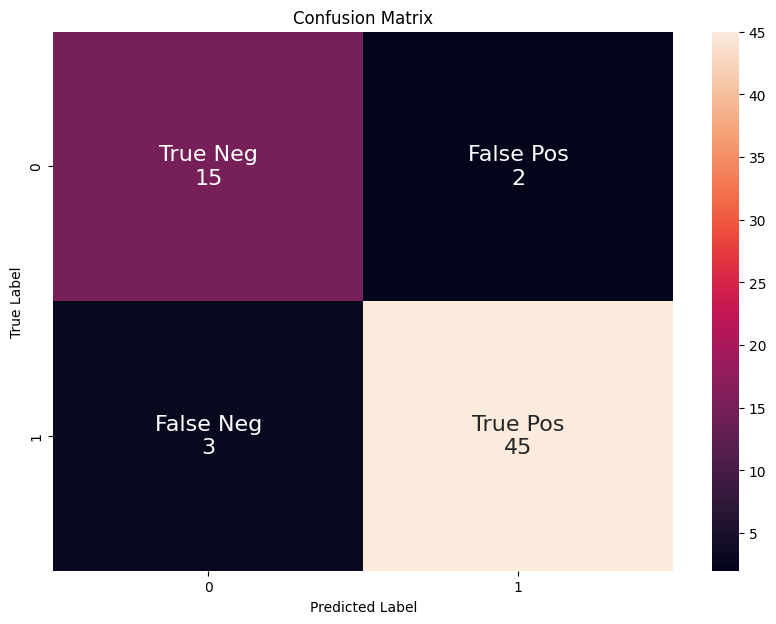

In [120]:
# creating confusion matrix heatmap

conf_mat = confusion_matrix(Y_test, gaussian_Y_pred)
fig = plt.figure(figsize=(10,7))
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                conf_mat.flatten()]
labels = [f"{v1}\n{v2}" for v1, v2 in zip(group_names,group_counts)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(conf_mat, annot=labels, annot_kws={"size": 16}, fmt='')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [121]:
print(classification_report(Y_test, gaussian_Y_pred))

              precision    recall  f1-score   support

           0       0.83      0.88      0.86        17
           1       0.96      0.94      0.95        48

    accuracy                           0.92        65
   macro avg       0.90      0.91      0.90        65
weighted avg       0.92      0.92      0.92        65



**DECISION TREE CLASSIFIER**

In [122]:
# Decision Tree

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
decision_tree_Y_pred = decision_tree.predict(X_test)
decision_tree_accuracy = decision_tree.score(X_test, Y_test)
decision_tree_accuracy*100

83.07692307692308

*CONFUSION MATRIX AND HEATMAP*


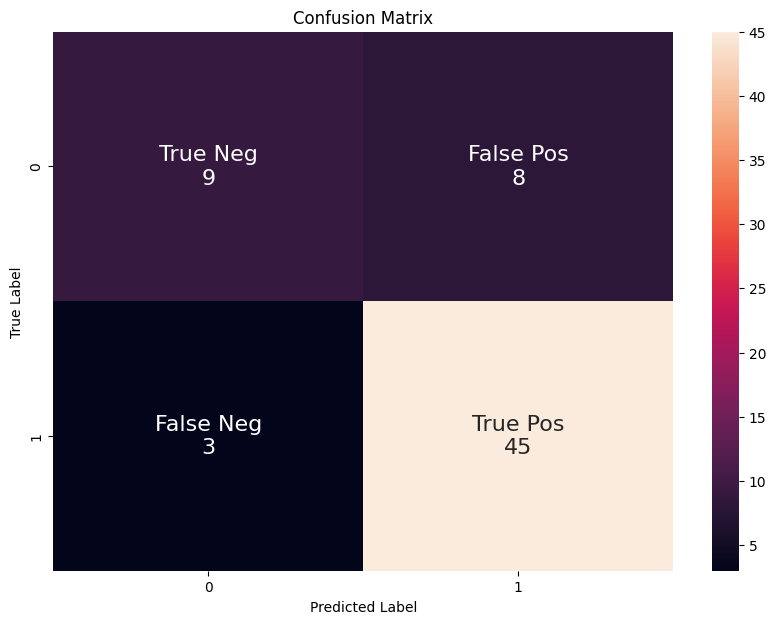

In [123]:
# creating confusion matrix heatmap

conf_mat = confusion_matrix(Y_test, decision_tree_Y_pred)
fig = plt.figure(figsize=(10,7))
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                conf_mat.flatten()]
labels = [f"{v1}\n{v2}" for v1, v2 in zip(group_names,group_counts)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(conf_mat, annot=labels, annot_kws={"size": 16}, fmt='')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [133]:
# getting precision, recall and f1-score via classification report

print(classification_report(Y_test, decision_tree_Y_pred))

              precision    recall  f1-score   support

           0       0.62      0.47      0.53        17
           1       0.83      0.90      0.86        48

    accuracy                           0.78        65
   macro avg       0.72      0.68      0.70        65
weighted avg       0.77      0.78      0.77        65



In [124]:
from prettytable import PrettyTable

# Create a table object
table = PrettyTable()

# Add columns
table.field_names = ["Model", "Accuracy"]

# Add rows
table.add_row(["GaussianNB", gaussian_accuracy])
table.add_row(["Decision Tree", decision_tree_accuracy])

# Set the align of each column
table.align["Model"] = "l"
table.align["Accuracy"] = "r"

# Print the table
print(table)


+---------------+--------------------+
| Model         |           Accuracy |
+---------------+--------------------+
| GaussianNB    | 0.9230769230769231 |
| Decision Tree | 0.8307692307692308 |
+---------------+--------------------+


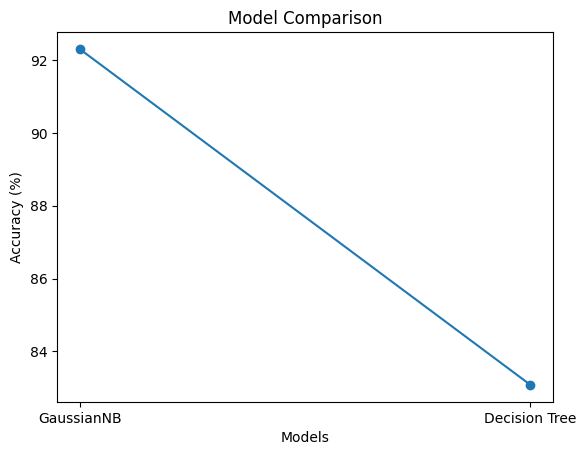

In [125]:
import matplotlib.pyplot as plt

models = ['GaussianNB', 'Decision Tree']
accuracy = [gaussian_accuracy*100, decision_tree_accuracy*100]

plt.plot(models, accuracy, marker='o')
plt.title('Model Comparison')
plt.xlabel('Models')
plt.ylabel('Accuracy (%)')
plt.show()


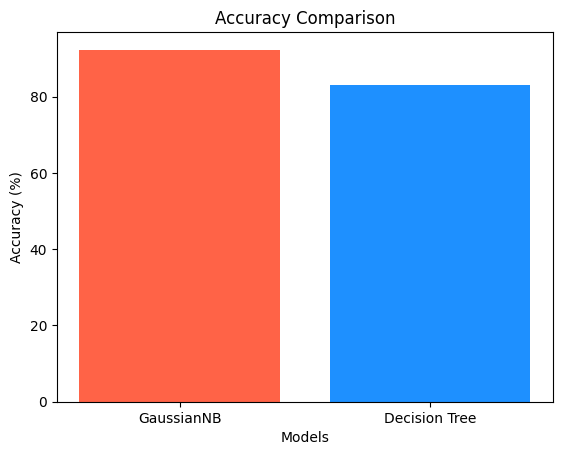

In [126]:
import matplotlib.pyplot as plt

# Define data and models
models = ['GaussianNB', 'Decision Tree']
accuracies = [gaussian_accuracy*100, decision_tree_accuracy*100]

# Set colors for each bar
colors = ['#FF6347', '#1E90FF']

# Create bar chart
plt.bar(models, accuracies, color=colors)

# Add title and axis labels
plt.title('Accuracy Comparison')
plt.xlabel('Models')
plt.ylabel('Accuracy (%)')

# Show plot
plt.show()


In [127]:
# Predict using Gaussian model
gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)
gaussian_Y_pred = gaussian.predict(X_test)

# Predict using Decision Tree model
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
decision_tree_Y_pred = decision_tree.predict(X_test)

# Create a dataframe with actual and predicted values for both models
results_df = pd.DataFrame({'Actual': Y_test, 
                           'Gaussian_Predicted': gaussian_Y_pred, 
                           'Decision_Predicted': decision_tree_Y_pred})

# Print the dataframe
print(results_df.head(10))


     Actual  Gaussian_Predicted  Decision_Predicted
133       1                   1                   1
93        0                   0                   1
40        1                   1                   1
121       1                   1                   1
132       1                   1                   1
115       1                   1                   1
79        0                   1                   1
38        1                   1                   1
77        1                   1                   1
47        1                   1                   1


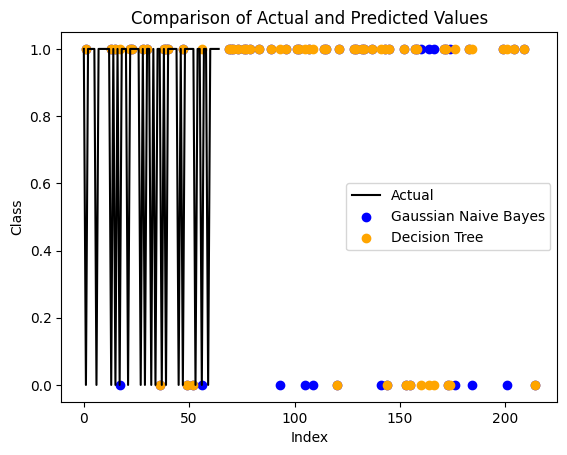

In [128]:
import matplotlib.pyplot as plt

# Plot actual values
plt.plot(Y_test.values, color='black', label='Actual')

# Plot predicted values for Gaussian Naive Bayes model
plt.scatter(Y_test.index, gaussian_Y_pred, color='blue', label='Gaussian Naive Bayes')

# Plot predicted values for Decision Tree model
plt.scatter(Y_test.index, decision_tree_Y_pred, color='orange', label='Decision Tree')

plt.title('Comparison of Actual and Predicted Values')
plt.xlabel('Index')
plt.ylabel('Class')
plt.legend()
plt.show()


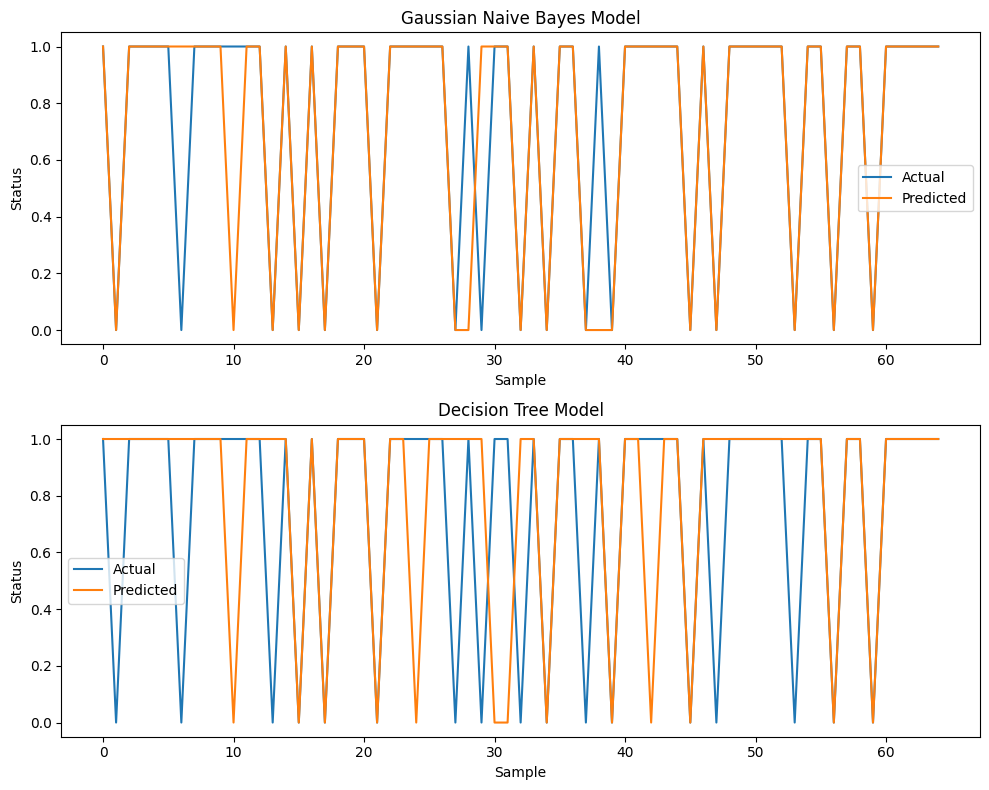

In [129]:
import matplotlib.pyplot as plt

# Create a figure with two subplots
fig, axs = plt.subplots(2, 1, figsize=(10, 8))

# Plot the actual vs predicted values for Gaussian Naive Bayes model
axs[0].plot(range(len(Y_test)), Y_test, label='Actual')
axs[0].plot(range(len(gaussian_Y_pred)), gaussian_Y_pred, label='Predicted')
axs[0].set_title('Gaussian Naive Bayes Model')
axs[0].set_xlabel('Sample')
axs[0].set_ylabel('Status')
axs[0].legend()

# Plot the actual vs predicted values for Decision Tree model
axs[1].plot(range(len(Y_test)), Y_test, label='Actual')
axs[1].plot(range(len(decision_tree_Y_pred)), decision_tree_Y_pred, label='Predicted')
axs[1].set_title('Decision Tree Model')
axs[1].set_xlabel('Sample')
axs[1].set_ylabel('Status')
axs[1].legend()

# Display the plot
plt.tight_layout()
plt.show()


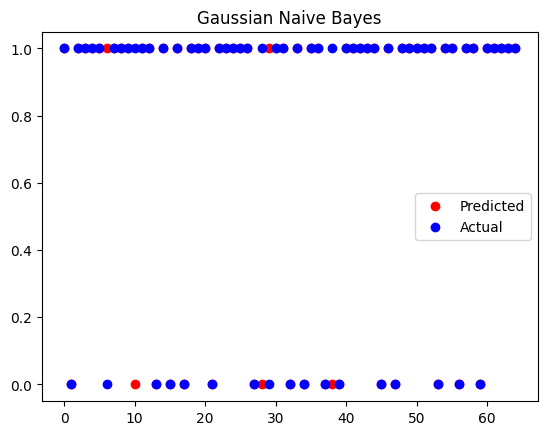

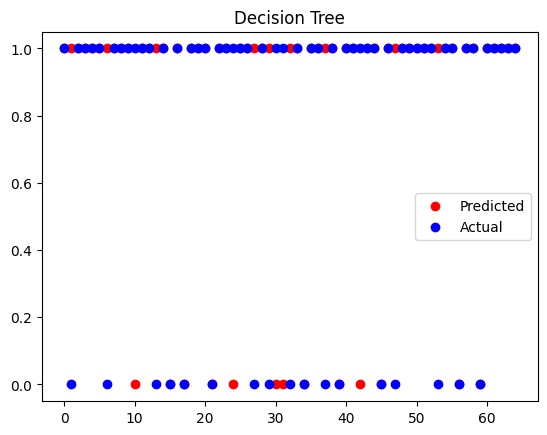

In [130]:
# Scatter plot for Gaussian Naive Bayes model
plt.scatter(range(len(Y_test)), gaussian_Y_pred, color='red', label='Predicted')
plt.scatter(range(len(Y_test)), Y_test, color='blue', label='Actual')
plt.title('Gaussian Naive Bayes')
plt.legend()
plt.show()

# Scatter plot for Decision Tree model
plt.scatter(range(len(Y_test)), decision_tree_Y_pred, color='red', label='Predicted')
plt.scatter(range(len(Y_test)), Y_test, color='blue', label='Actual')
plt.title('Decision Tree')
plt.legend()
plt.show()


In [131]:
from sklearn.metrics import classification_report
import pandas as pd

# Gaussian Naive Bayes classification report
gnb_report = classification_report(Y_test, gaussian_Y_pred, output_dict=True)
gnb_df = pd.DataFrame(gnb_report).transpose()
gnb_df = gnb_df.drop(['support'], axis=1)

# Decision Tree classification report
dt_report = classification_report(Y_test, decision_tree_Y_pred, output_dict=True)
dt_df = pd.DataFrame(dt_report).transpose()
dt_df = dt_df.drop(['support'], axis=1)

# Concatenate the two reports
compare_df = pd.concat([gnb_df, dt_df], axis=1, keys=['Gaussian Naive Bayes', 'Decision Tree'])

print(compare_df)


             Gaussian Naive Bayes                     Decision Tree            \
                        precision    recall  f1-score     precision    recall   
0                        0.833333  0.882353  0.857143      0.615385  0.470588   
1                        0.957447  0.937500  0.947368      0.826923  0.895833   
accuracy                 0.923077  0.923077  0.923077      0.784615  0.784615   
macro avg                0.895390  0.909926  0.902256      0.721154  0.683211   
weighted avg             0.924986  0.923077  0.923771      0.771598  0.784615   

                        
              f1-score  
0             0.533333  
1             0.860000  
accuracy      0.784615  
macro avg     0.696667  
weighted avg  0.774564  


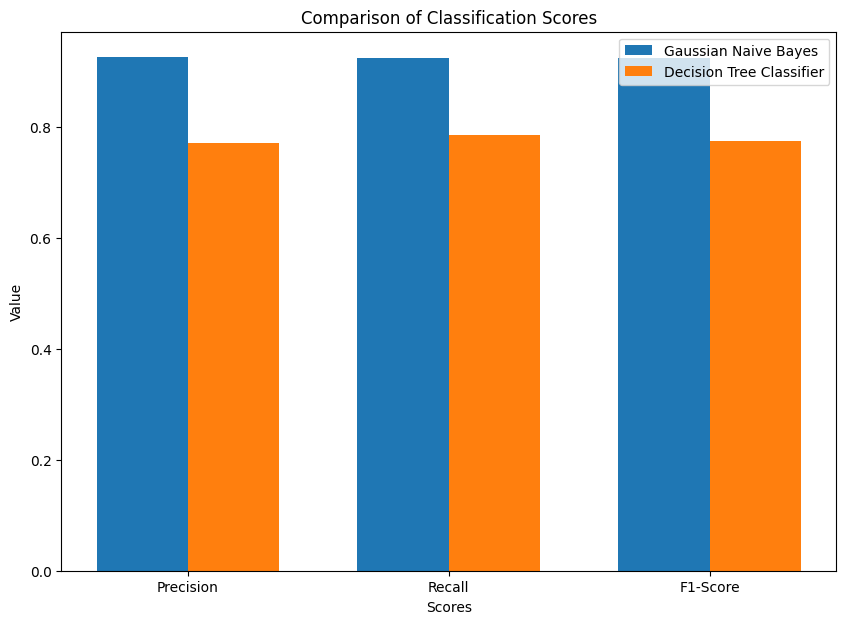

In [132]:
from sklearn.metrics import precision_recall_fscore_support
import matplotlib.pyplot as plt
import numpy as np

# Get precision, recall, and f1-score for both models
gnb_scores = precision_recall_fscore_support(Y_test, gaussian_Y_pred, average='weighted')[:3]
dtc_scores = precision_recall_fscore_support(Y_test, decision_tree_Y_pred, average='weighted')[:3]

# Define data for the bar chart
models = ['Gaussian Naive Bayes', 'Decision Tree Classifier']
scores = [gnb_scores, dtc_scores]
labels = ['Precision', 'Recall', 'F1-Score']

# Create the bar chart
fig, ax = plt.subplots(figsize=(10,7))
width = 0.35
x = np.arange(len(labels))

for i in range(len(models)):
    ax.bar(x - width/2 + i*width, scores[i], width, label=models[i])

ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.set_xlabel('Scores')
ax.set_ylabel('Value')
ax.set_title('Comparison of Classification Scores')
ax.legend()

plt.show()
